In [16]:
from modules import *
%matplotlib inline
# %matplotlib notebook

### 1. Load dataset

FileChooser(path='C:\git\JoaoAmaro2001\notebooks\src\ingestion', filename='', title='<b>Select the Dataset fol…

Loading dataset: Lisbon_Lapa_sub-OE102009_2024-05-02T132016Z...
@(WIN) --> I:\João\Exp_4-outdoor_experiment\OE009\Lisbon_Lapa_sub-OE102009_2024-05-02T132016Z\20240502142011_OE102009_EXP4.nedf
Reading file...
Header information has been correctly retrieved.
Attempting to automatically correct eeg timestamps to harp timestamps...
Done.
Dataset: <pluma.schema.Dataset object at 0x000002528F727A10> loaded successfully, and sucessfully calibrated.
Failed Stream Harp stream from device 		TK, stream GPS_Latitude(227): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Longitude(228): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Altitude(229): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_HasFix(232): Input dataframe is empty.


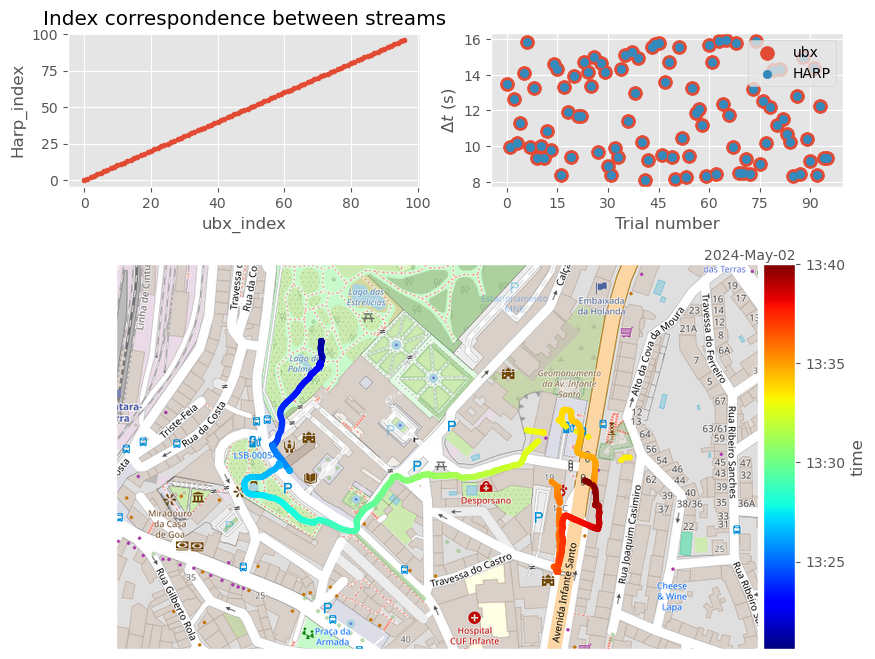

In [32]:
datapicker = create_datapicker()
display(datapicker)

### 2. Explore Dataset Maps

In [4]:
# datapicker.geodata
"""Assess datapicker geodata information

"""
import pprint

# pprint.pprint(dir(datapicker.geodata))
pprint.pprint(datapicker.geodata.columns)
methods = [method for method in dir(datapicker.geodata) if not method.startswith('__') and not method.endswith('__')]
pprint.pprint(methods)

Index(['tk_gps_data_value', 'tk_gps_time_value',
       'tk_airquality_iaqindex_value', 'tk_airquality_temperature_value',
       'tk_airquality_humidity_value', 'tk_airquality_airpressure_value',
       'tk_soundpressurelevel_spl_value', 'tk_humidity_humidity_value',
       'tk_analogin_voltage_value', 'tk_particulatematter_pm1_0_value',
       'tk_particulatematter_pm2_5_value', 'tk_particulatematter_pm10_0_value',
       'tk_dual0_20ma_solarlight_value', 'tk_thermocouple_temperature_value',
       'tk_ptc_airtemp_value', 'atmos_northwind_value', 'atmos_eastwind_value',
       'atmos_gustwind_value', 'atmos_airtemperature_value',
       'atmos_xorientation_value', 'atmos_yorientation_value',
       'atmos_nullvalue_value', 'accelerometer_orientation_x',
       'accelerometer_orientation_y', 'accelerometer_orientation_z',
       'accelerometer_gyroscope_x', 'accelerometer_gyroscope_y',
       'accelerometer_gyroscope_z', 'accelerometer_linearaccl_x',
       'accelerometer_linearaccl_y

In [8]:
"""
Use this cell to obtain other types of information from the datapicker object.
For example, the following code will display the type of the geodata attribute.
Use it to export some information.
"""

print(type(datapicker.geodata)) # <class 'geopandas.geodataframe.GeoDataFrame'>
datapicker.geodata.to_csv(r'C:\git\JoaoAmaro2001\notebooks\src\output\geodata.csv') # Save the data to a csv file
datapicker.geodata.to_file(r'C:\git\JoaoAmaro2001\notebooks\src\output\geodata.geojson', driver='GeoJSON') # Save the data to a geojson file

<class 'geopandas.geodataframe.GeoDataFrame'>


#### 2.1. Create new variables

In [17]:
# Change the scale of units of humidity
humidity = datapicker.geodata.tk_humidity_humidity_value / 100


In [48]:
map = exploremap(datapicker.geodata, column='accelerometer_accl_x', cmap = 'hot')
map # Display the map

### 3. Explore Dataset Streams

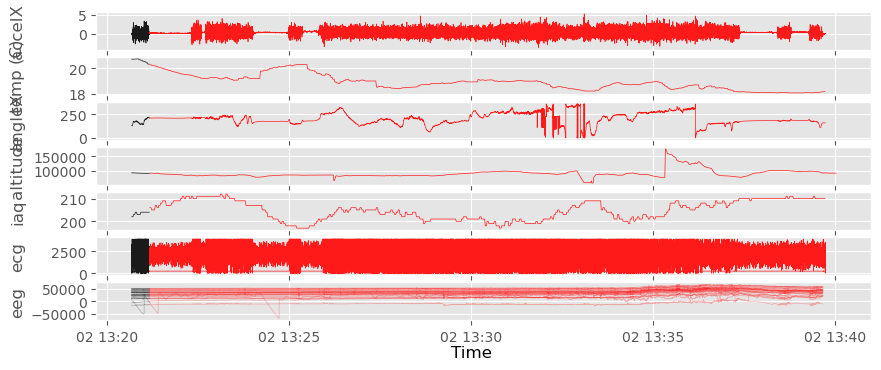

In [103]:
plot_traces({
    'accelX': datapicker.dataset.streams.Accelerometer.data["Accl_X"],
    'temp (C)': datapicker.dataset.streams.TK.AirQuality.Temperature.data/100,
    'angleX': datapicker.dataset.streams.Accelerometer.data["Orientation_X"],
    'altitude': datapicker.dataset.georeference.elevation,
    'iaq': datapicker.dataset.streams.TK.AirQuality.IAQIndex.data,
    'ecg': datapicker.dataset.streams.BioData.ECG.data,
    'eeg': datapicker.dataset.streams.EEG.data,
    }, 
    segments=[
    ('2024-05-02 13:20:40.731324594', [0.1, 0.1, 0.1]), 
    ('2024-05-02 13:21:10.246332594', [1, 0.1, 0.1])
    ])

### 4. Export Data to CSV

In [ ]:
coords = datapicker.geodata.geometry.get_coordinates(include_z=True)
# coords.rename(columns = {'y':'latitude', 'x':'longitude','z':'elevation'}, inplace = True)
# coords
coords

In [30]:
dataexport = datapicker.geodata.join(coords).drop(columns=['geometry'])
dataexport.to_csv("full_geodata.csv")



### 5. EEG

In [61]:
eeg = datapicker.dataset.streams.EEG
""" Additional information about the dataset
"""
print(dir(datapicker.dataset.streams.EEG))
print(dir(datapicker.dataset.streams.EEG.data.np_markers)) # See attributes of the data
print(type(datapicker.dataset.streams.EEG.data)) # See type of data

In [ ]:
print(eeg.data.np_eeg.shape) # Get the shape (dims) of the EEG data
print(eeg.data._NedfReader__get_info()) # Get the information of the EEG data

#### 5.1. Events

In [109]:
revts = datapicker.dataset.streams.EEG.server_lsl_marker
evts = revts[revts.MarkerIdx>35000] # Type -> <class 'pandas.core.frame.DataFrame'>
print(evts)

                          Seconds  LslTimestamp  MarkerIdx  EegSample  \
1   2024-05-02 13:20:40.731324594   5971.719913      35001      14622   
5   2024-05-02 13:21:10.246332594   6001.234491      35101      29378   
11  2024-05-02 13:22:17.439324594   6068.427420      35201      62973   
14  2024-05-02 13:22:37.130332594   6088.118653      35301      72819   
22  2024-05-02 13:24:01.800348594   6172.788325      35102     115152   
28  2024-05-02 13:24:56.524348594   6227.513153      35202     142513   
31  2024-05-02 13:25:20.682332594   6251.671264      35302     154592   
92  2024-05-02 13:37:22.877340594   6973.867049      35103     515675   
99  2024-05-02 13:38:22.714332594   7033.704483      35203     545592   
102 2024-05-02 13:38:46.440348594   7057.430576      35303     557455   
107 2024-05-02 13:39:35.045340594   7106.035582      35002     581756   

     EegTimestamp  
1       29.243999  
5       58.756001  
11     125.945999  
14     145.638000  
22     230.304001  
28 

#### 5.2. Plot

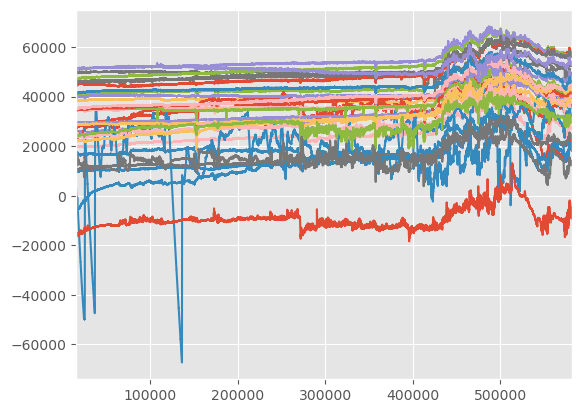

In [86]:
# Plot the data
eeg.data.np_eeg[14622, 1]
plt.plot(eeg.data.np_eeg)  # np_eeg is a numpy array with the EEG data - for processing purposes
plt.xlim(evts['EegSample'].iloc[0], evts['EegSample'].iloc[-1])  # Set x-axis limits (beginning and end of the event)
plt.show()

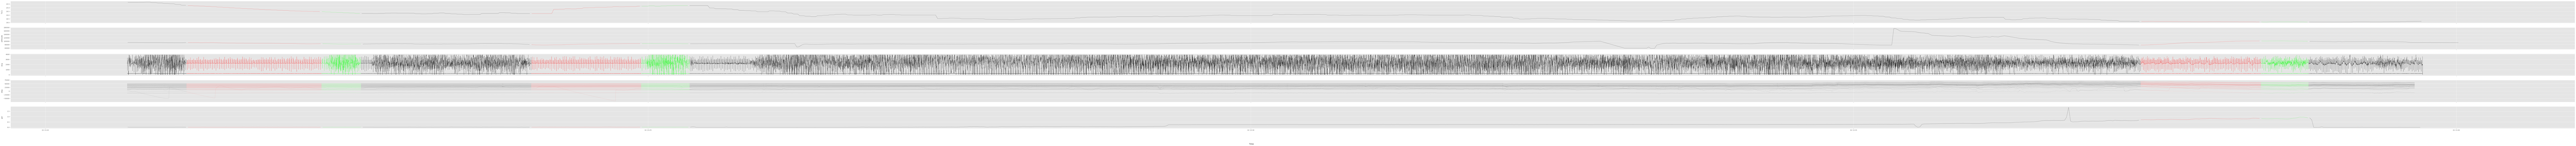

In [121]:
plot_traces({
    'T(C)': datapicker.dataset.streams.TK.AirQuality.Temperature.data/100,
    'altitude': datapicker.dataset.georeference.elevation,
    'ecg': datapicker.dataset.streams.BioData.ECG.data,
    'eeg': datapicker.dataset.streams.EEG.data,
    'gsr': datapicker.geodata.empatica_e4_gsr,
    }, 
    segments=[
    (evts['Seconds'][1], [0.1, 0.1, 0.1]), 
    (evts['Seconds'][5], [1, 0.1, 0.1]),
    (evts['Seconds'][11], [0.1, 1, 0.1]),
    (evts['Seconds'][14], [0.1, 0.1, 0.1]),
    (evts['Seconds'][22], [1, 0.1, 0.1]),
    (evts['Seconds'][28], [0.1, 1, 0.1]),
    (evts['Seconds'][31], [0.1, 0.1, 0.1]),
    (evts['Seconds'][92], [1, 0.1, 0.1]),
    (evts['Seconds'][99], [0.1, 1, 0.1]),
    (evts['Seconds'][102], [0.1, 0.1, 0.1])
    ],
    figsize = (300,15)
    )

#### 5.3. Export EEG to EEGLAB (.set)

In [ ]:
import mne

# Assuming 'raw' is your Raw object
mne.export.export_eeglab(raw, 'output_file.set')

### 6. Export Dataset to OGC API

In [ ]:
record = DatasetRecord(datapicker.dataset, datapicker.geodata, properties=RecordProperties(
    title='<City> Outdoor Walk: <CityRegion> Subject <ID>',
    description='Outdoor walk data collection',
    license='CC BY-NC 4.0',
    tool='Bonsai',
    keywords=['<City>', 'Outdoor', 'Walk', 'Microclimate', 'Biosignals'],
    contacts=[
        Contact(
            name='Your Name',
            institution='Your Institution',
            email='youremail@yourdomain.com'
        )
    ],
    themes=[]
))

In [ ]:
rpath = Path(record.id)
export_geoframe_to_geojson(datapicker.geodata, rpath.with_suffix('.geojson'))
with open(rpath.with_suffix('.json'), 'w') as f:
    f.write(record.to_json())

### Support

#### Quesions for NGR

- [ ] How can I make plots interactable? I want to zoom in and out. Furthermore, I want to check different timepoints.
- [ ] Meaning of EEG events?
- [ ] Can I overlap maps on the openstreetmap plot? Such as a .kmz file.
- [ ] How can I see pupilabs eye-tracking data?
- [ ] How to export to SDI? Should I do it?
- [ ] Why is empatica_hr black in most places?z
- [ ] Can we change the base map? OpenStreetMaps has different views.
- [ ] Will you update the datapicker.geodata columns (e.g. skin surface temperature)?  
- [ ] Why can I not load `I:\João\Exp_4-outdoor_experiment\OE003\Lisbon_Baixa_sub-OE104003_2024-04-16T160350Z\`? TIM.csv problem.

```python
{
	"name": "KeyError",
	"message": "'Class'",
	"stack": "---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\ipyfilechooser\\filechooser.py:317, in FileChooser._on_select_click(self, _b)
    315 if self._callback is not None:
    316     try:
--> 317         self._callback(self)
    318     except TypeError:
    319         # Support previous behaviour of not passing self
    320         self._callback()

File c:\\git\\JoaoAmaro2001\
otebooks\\src\\ingestion\\modules.py:43, in create_datapicker.<locals>.dataset_changed(chooser)
     41 display(chooser)
     42 print(f\"Loading dataset: {Path(chooser.selected_path).name}...\" )
---> 43 dataset = load_dataset(chooser.selected_path, schema=custom_schema)
     44 print(f\"Dataset: {dataset} loaded successfully, and {'not' if not dataset.has_calibration else 'sucessfully'} calibrated.\" )
     45 plot_summary(dataset)

File c:\\git\\JoaoAmaro2001\
otebooks\\src\\ingestion\\helpers.py:27, in load_dataset(root, schema, reload, export_path)
     22 dataset.populate_streams(autoload=False)  # Add the \"schema\" that we want to load to our Dataset. If we want to load the whole dataset automatically, set autoload to True.
     24 if reload:
     25     # We will just load every single stream at the same time. This might take a while if loading from AWS
     26     # Some warnings will be printed if some sensors were not acquired during the experiment. These are normal and can be usually ignored.
---> 27     dataset.reload_streams(force_load=True)
     28     sync_lookup = dataset.calibrate_ubx_to_harp()
     29     dataset.add_ubx_georeference()

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\schema\\__init__.py:113, in Dataset.reload_streams(self, force_load)
    111 for stream in self._iter_schema_streams(self.streams):
    112     if force_load is True:
--> 113         stream.load()
    114     else:
    115         if stream.autoload is True:

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\stream\\ubx.py:29, in UbxStream.load(self)
     28 def load(self):
---> 29 \tself.load_event_list(self.autoload_messages)

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\stream\\ubx.py:46, in UbxStream.load_event_list(self, events)
     44 def load_event_list(self, events: list):
     45 \tfor event in events:
---> 46 \t\tself.load_event(event)

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\stream\\ubx.py:33, in UbxStream.load_event(self, event)
     31 \tdef load_event(self, event: _UBX_MSGIDS):
     32 \t\tself._update_dotmap(event,
---> 33                       load_ubx_event_stream(
     34                           event,
     35                           root=self.rootfolder)
     36                       )

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pluma\\io\\ubx.py:158, in load_ubx_event_stream(ubxmsgid, root, ubxfolder)
    152 bin_file = load_ubx_bin_event(ubxmsgid=ubxmsgid,
    153                               root=root,
    154                               ubxfolder=ubxfolder)
    155 csv_file = load_ubx_harp_ts_event(ubxmsgid=ubxmsgid,
    156                                   root=root,
    157                                   ubxfolder=ubxfolder)
--> 158 if (bin_file['Class'].values == csv_file['Class'].values).all():
    159     bin_file['Seconds'] = csv_file.index
    160     bin_file = bin_file.set_index('Seconds')

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pandas\\core\\frame.py:4090, in DataFrame.__getitem__(self, key)
   4088 if self.columns.nlevels > 1:
   4089     return self._getitem_multilevel(key)
-> 4090 indexer = self.columns.get_loc(key)
   4091 if is_integer(indexer):
   4092     indexer = [indexer]

File c:\\git\\JoaoAmaro2001\
otebooks\\.conda\\Lib\\site-packages\\pandas\\core\\indexes\\range.py:417, in RangeIndex.get_loc(self, key)
    415         raise KeyError(key) from err
    416 if isinstance(key, Hashable):
--> 417     raise KeyError(key)
    418 self._check_indexing_error(key)
    419 raise KeyError(key)

KeyError: 'Class'"
}
```
- [ ] Why can I not load `Lisbon_Belem_sub-OE101005_2024-05-10T111823Z` (after gps synch fix)?
```python
Failed Stream Harp stream from device 		TK, stream GPS_Latitude(227): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Longitude(228): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_Altitude(229): Input dataframe is empty.
Failed Stream Harp stream from device 		TK, stream GPS_HasFix(232): Input dataframe is empty.
```